## Converting points into shapes 2: Alpha shapes

The partner of converting a shape into a point is to take a group of points and convert them into a single shape. This is especially useful in things like community detection, for example, where we want to identify a number of cells in close proximity to one another for analysis as a group.

Let's start by loading the `Synthetic-Points-Architecture` dataset, which contains several different clusters of points.

MuSpAn domain loaded successfully. Domain summary:
Domain name: Architecture
Number of objects: 5991
Collections: ['Cell centres']
Labels: ['Celltype'] 
Networks: [] 
Distance matrices: []


(<Figure size 1000x800 with 2 Axes>, <Axes: >)

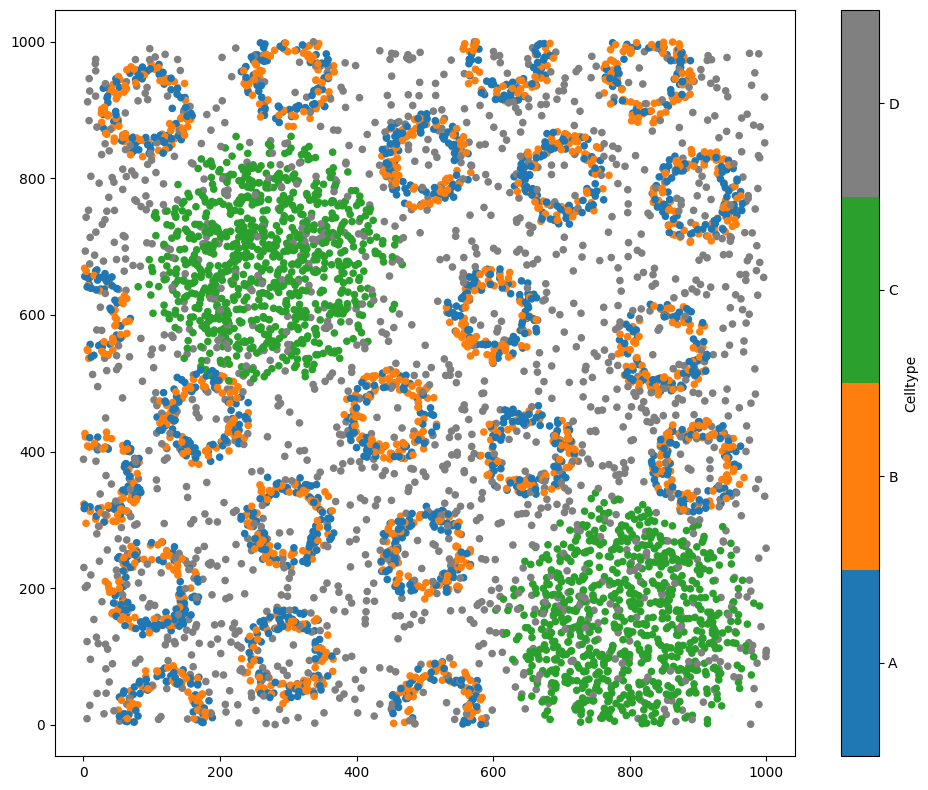

In [1]:
# Import necessary libraries
import muspan as ms
import matplotlib.pyplot as plt

# Load the example domain dataset
domain = ms.datasets.load_example_domain('Synthetic-Points-Architecture')

# Visualize the domain with cells colored by their cell type
ms.visualise.visualise(domain, color_by='Celltype')

For now, let's focus on the two large clusters of cells of type C.

(<Figure size 1000x800 with 2 Axes>, <Axes: >)

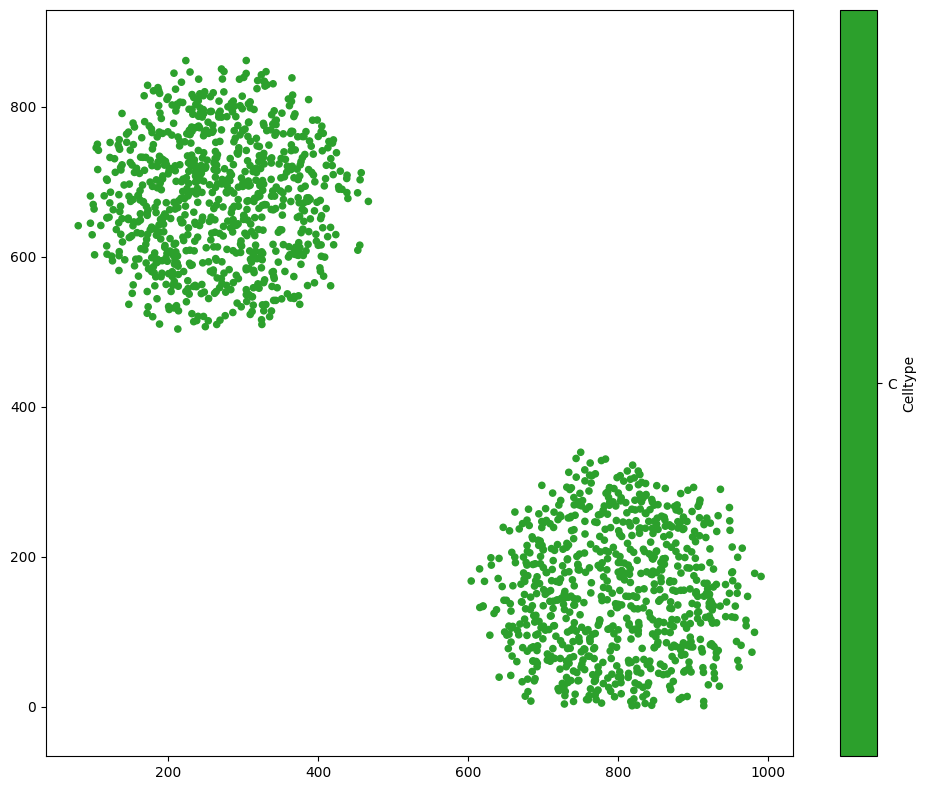

In [2]:
# Query the domain to get cells of type 'C'
type_C_cells = ms.query.query(domain, ('label', 'Celltype'), 'is', 'C')

# Visualize the domain with cells of type 'C' highlighted
ms.visualise.visualise(domain, color_by='Celltype', objects_to_plot=type_C_cells)

MuSpAn provides a few different methods of combining objects, via the `domain.convert_objects` function. Let's tell `convert_objects` that we want the result as a shape, using the `object_type='shape'` and `conversion_method='convex hull'`, and plot that instead.

[5991]


(<Figure size 1000x800 with 1 Axes>, <Axes: >)

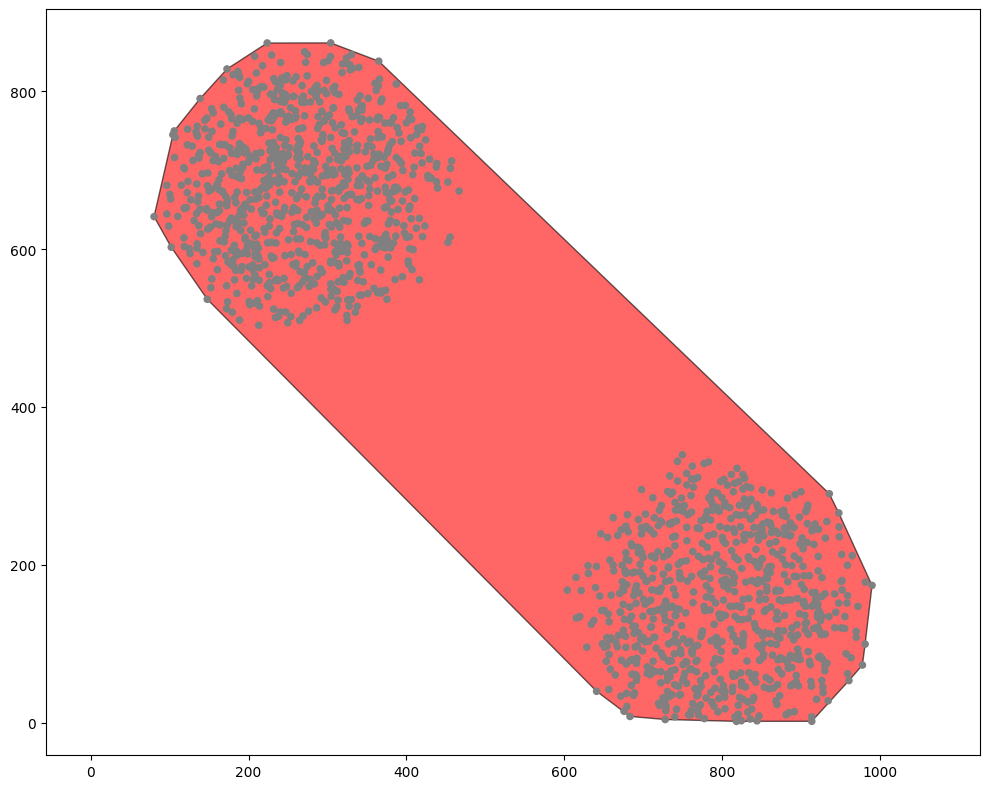

In [3]:
# Convert the objects to a single shape using the convex hull method
IDs = domain.convert_objects(
    population=type_C_cells,
    object_type='shape',
    conversion_method='convex hull',
    collection_name='New object',
    inherit_collections=False,
    return_IDs=True
)
print(IDs)

# Visualize the original cells of type 'C' in grey
ms.visualise.visualise(domain, color_by=('constant', 'grey'), objects_to_plot=type_C_cells)

# Visualize the new convex hull shape in red
ms.visualise.visualise(domain, color_by=('constant', 'red'), objects_to_plot=IDs, ax=plt.gca())

That's better. The new shape has been added, surrounding both the clusters. But a convex hull is not necessarily the best choice - in this example, for instance, we probably want the two clusters to be two separated objects! Let's instead use the argument `conversion_method='alpha shape'` to calculate the [alpha shape](https://en.wikipedia.org/wiki/Alpha_shape) surrounding the points, for a few different values of alpha.

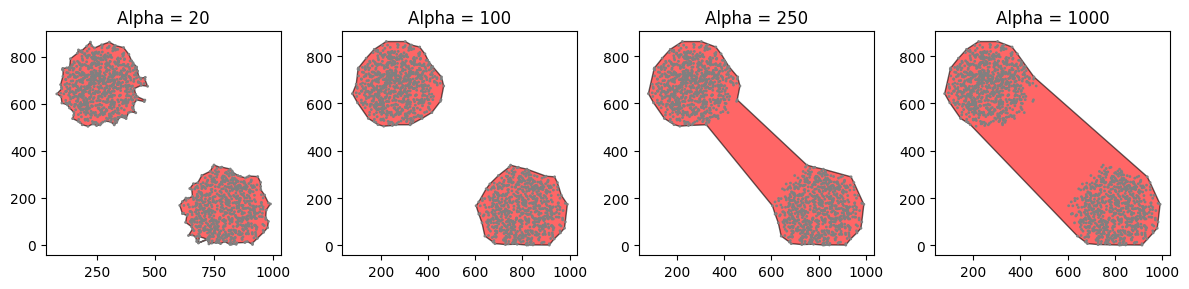

In [4]:
# Create a figure with 4 subplots
fig, axes = plt.subplots(1, 4, figsize=(12, 3))

# Iterate over different alpha values to visualize the alpha shapes
for i, alpha in enumerate([20, 100, 250, 1000]):
    # Convert the objects to a single shape using the alpha shape method
    new_IDs = domain.convert_objects(
        population=type_C_cells,
        object_type='shape',
        conversion_method='alpha shape',
        conversion_method_kwargs=dict(alpha=alpha),
        collection_name='New object',
        inherit_collections=False,
        return_IDs=True
    )

    # Visualize the original cells of type 'C' in grey
    ms.visualise.visualise(domain, color_by=('constant', 'grey'), objects_to_plot=type_C_cells, ax=axes[i], marker_size=1)
    
    # Visualize the new alpha shape in red
    ms.visualise.visualise(domain, color_by=('constant', 'red'), objects_to_plot=new_IDs, ax=axes[i])
    
    # Set the title for each subplot
    axes[i].set_title(f'Alpha = {alpha}')

As you can see, we need to be a bit careful when we're using an alpha shape - the resulting shape can be very sensitive to the choice of alpha! Think of alpha as being the radius of a ball that we're rolling around the edge of the points. Too small, and we'll pick up lots of small nooks and crannies that we don't really want. Too large, and we might join up sets of points that we'd like to think of as part of different shapes. If we make alpha large enough, we'll retrieve the convex hull of the points.

The alpha shape method of `convert_objects` can also return shapes with holes inside. Let's finish by finding the alpha shape of the rings of blue and orange cells (cell types 'A' and 'B'), with a carefully chosen alpha value that identifies the internal boundaries.

Text(0.5, 1.0, 'Alpha = 20')

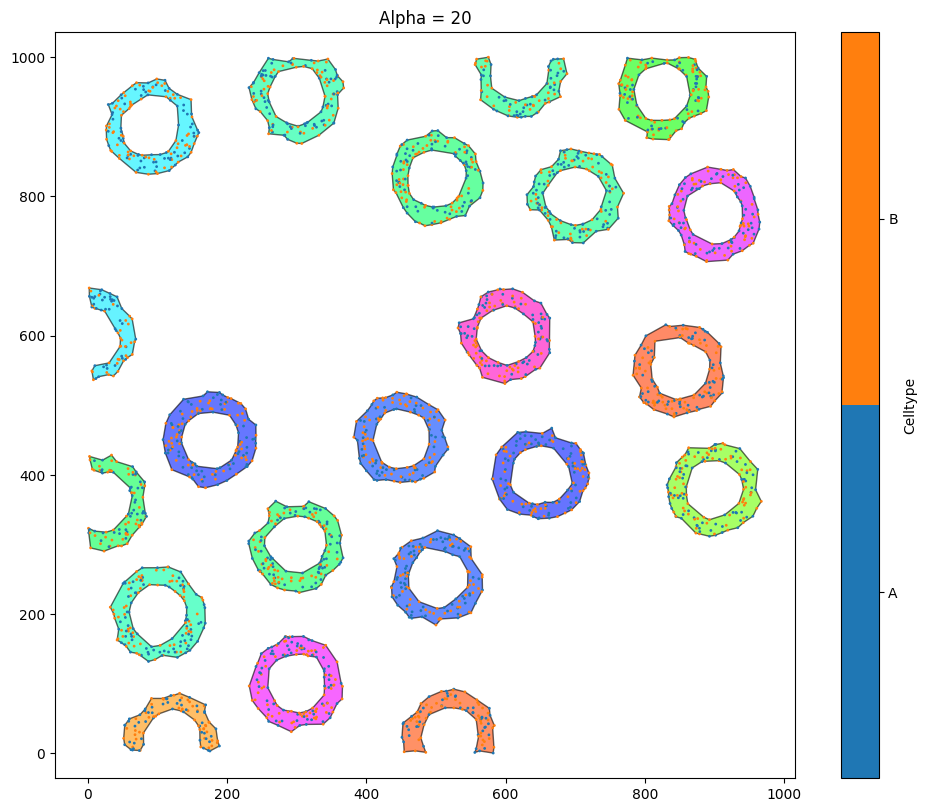

In [5]:
# Query the domain to get cells of type 'A' and 'B'
type_A_cells = ms.query.query(domain, ('label', 'Celltype'), 'is', 'A')
type_B_cells = ms.query.query(domain, ('label', 'Celltype'), 'is', 'B')

# Combine the cells of type 'A' and 'B' into a single container
rings = ms.query.query_container(type_A_cells, 'OR', type_B_cells)

# set alpha value - this controls the level of detail of the resulting shape
alpha = 20

# Convert the combined cells to a single shape using the alpha shape method with alpha=20
new_IDs = domain.convert_objects(
    population=rings,
    object_type='shape',
    conversion_method='alpha shape',
    conversion_method_kwargs=dict(alpha=alpha),
    collection_name='New object',
    inherit_collections=False,
    return_IDs=True
)

# Visualize the original cells of type 'A' and 'B' with their respective colors
ms.visualise.visualise(domain, color_by=('label', 'Celltype'), objects_to_plot=rings, marker_size=1)

# Visualize the new alpha shape in random colors
ms.visualise.visualise(domain, color_by=('random',), objects_to_plot=new_IDs, ax=plt.gca())

# Set the title for the current subplot
plt.gca().set_title(f'Alpha = {alpha}')